In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Source Kaggle Datasets url 'https://www.kaggle.com/datasets/jameslko/gun-violence-data'

In [29]:
data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [30]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [31]:
data.shape

(239677, 29)

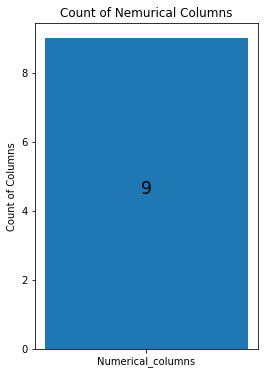

In [52]:
numerical_dtype = ['int16','int32','int64','float16','float32','float64']

numerical_data =  data.select_dtypes(include=numerical_dtype)

count_num_col=len(numerical_data.columns)

fig = plt.figure(figsize=(4,6))

plt.bar(x='Numerical_columns',height=count_num_col)

plt.ylabel('Count of Columns')

plt.title('Count of Nemurical Columns')

plt.text(0,count_num_col/2,count_num_col,ha ='center', fontsize='xx-large')

plt.show()

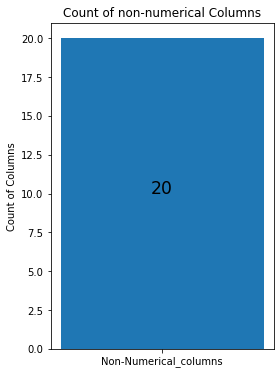

In [85]:
numerical_dtype = ['int16','int32','int64','float16','float32','float64']

str_data =  data.select_dtypes(exclude=numerical_dtype)

count_str_col=len(str_data.columns)

fig = plt.figure(figsize=(4,6))

plt.bar(x='Non-Numerical_columns',height=count_str_col)

plt.ylabel('Count of Columns')

plt.title('Count of non-numerical Columns')

plt.text(0,count_str_col/2,count_str_col,ha ='center', fontsize='xx-large')

plt.show()

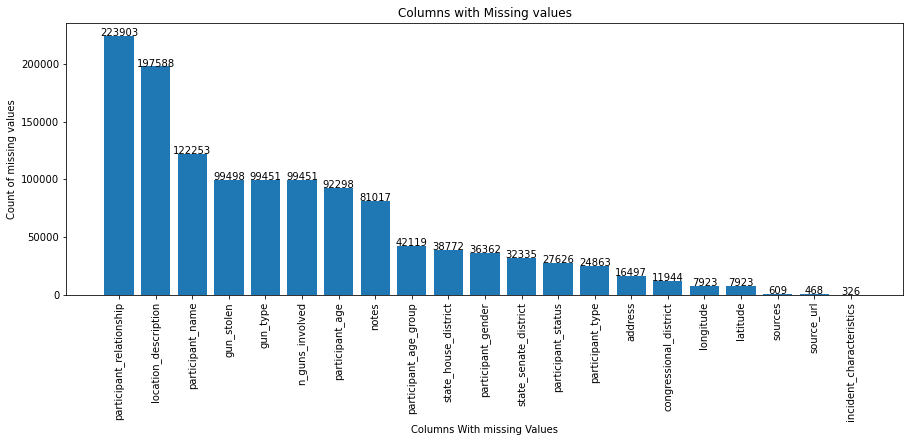

In [93]:
count_missing_values  = data.isna().sum()[data.isna().sum()>1].sort_values(ascending=False)

def addlabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center', fontsize= 'medium')
        

fig = plt.figure(figsize=(15,5))
x = count_missing_values.keys()
plt.bar(x,count_missing_values)
addlabel(x,count_missing_values)
plt.xlabel('Columns With missing Values')
plt.ylabel('Count of missing values')
plt.title('Columns with Missing values')
plt.xticks(rotation=90)
plt.show()

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [95]:
data = data.drop(columns=['incident_id'])

In [103]:
data['participant_type']

0         0::Victim||1::Victim||2::Victim||3::Victim||4:...
1         0::Victim||1::Victim||2::Victim||3::Victim||4:...
2         0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3         0::Victim||1::Victim||2::Victim||3::Subject-Su...
4         0::Victim||1::Victim||2::Victim||3::Subject-Su...
                                ...                        
239672                                   0::Subject-Suspect
239673                        0::Victim||1::Subject-Suspect
239674                                            0::Victim
239675                                            0::Victim
239676                        0::Victim||1::Subject-Suspect
Name: participant_type, Length: 239677, dtype: object

In [108]:
data = data.drop(columns=['address','incident_url','source_url', 'incident_url_fields_missing','incident_characteristics',
                          'location_description','notes','participant_name','sources'],axis=1)

In [111]:
len(data.columns)

19

In [112]:
data.head()

,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [113]:
data.describe()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


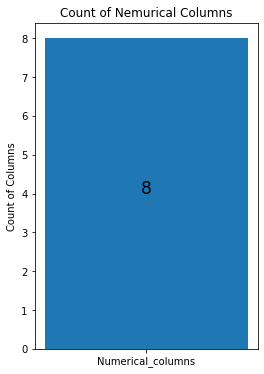

In [114]:
# count of numerical columns after dropping columns'
numerical_dtype = ['int16','int32','int64','float16','float32','float64']

numerical_data =  data.select_dtypes(include=numerical_dtype)

count_num_col=len(numerical_data.columns)

fig = plt.figure(figsize=(4,6))

plt.bar(x='Numerical_columns',height=count_num_col)

plt.ylabel('Count of Columns')

plt.title('Count of Nemurical Columns')

plt.text(0,count_num_col/2,count_num_col,ha ='center', fontsize='xx-large')

plt.show()

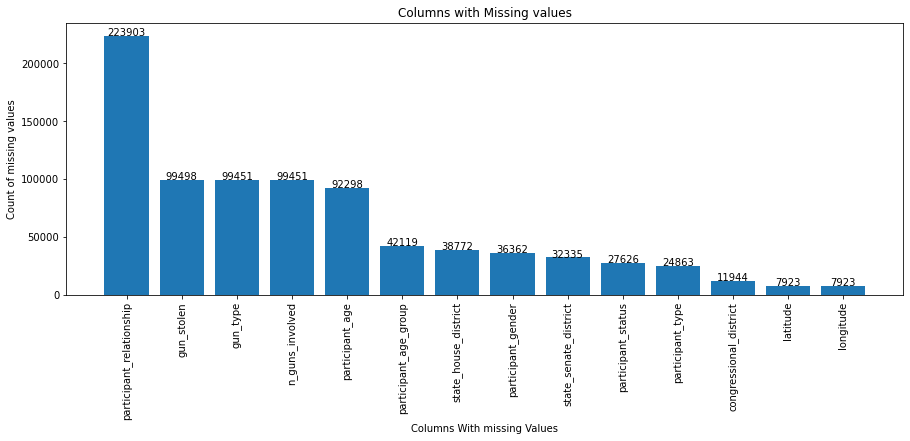

In [115]:
#count of missing columns after dropping columns
count_missing_values  = data.isna().sum()[data.isna().sum()>1].sort_values(ascending=False)

def addlabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center', fontsize= 'medium')
        

fig = plt.figure(figsize=(15,5))
x = count_missing_values.keys()
plt.bar(x,count_missing_values)
addlabel(x,count_missing_values)
plt.xlabel('Columns With missing Values')
plt.ylabel('Count of missing values')
plt.title('Columns with Missing values')
plt.xticks(rotation=90)
plt.show()

In [125]:
corr_matrix= data[['n_killed','n_injured','n_guns_involved','state_house_district','state_senate_district']].corr()

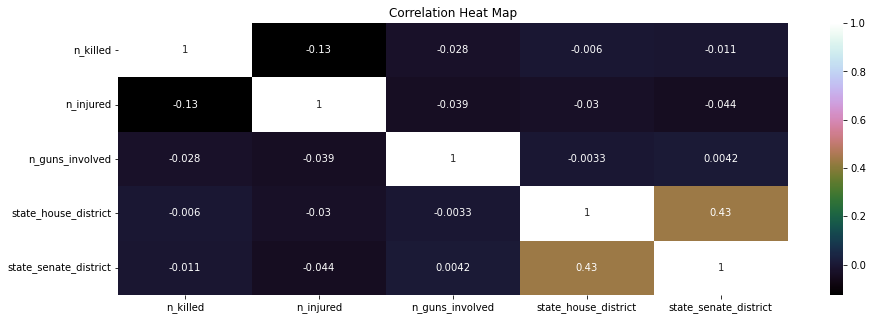

In [142]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix,cmap='cubehelix', annot=True)

plt.title('Correlation Heat Map')
plt.show()

### There is not much correlation between columns

In [ ]:
###Questions to answer
1. Which states have highest number of gun incidents?
2. Number of fatalities and injuries total and each state? injuries and deaths due to gun violence per capita
2. relationship between n_of_guns and fatalities, injuries?
3. most gun types user?
4. Guns stolen in how many incidents?
5. gender Involved
6. age group involved
7. 